In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

pd.options.display.float_format = '{:,.5f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

# Get data and pre-process

#### 1a


In [2]:
# fetch data from csv file
diamonds_df=pd.read_csv('diamonds.csv')

#display the first five lines of the dataframe
diamonds_df.head()

#data types of all the columns in the dataframe
diamonds_df.dtypes



,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23000,Ideal,E,SI2,61.50000,55.00000,326,3.95000,3.98000,2.43000
1,2,0.21000,Premium,E,SI1,59.80000,61.00000,326,3.89000,3.84000,2.31000
2,3,0.23000,Good,E,VS1,56.90000,65.00000,327,4.05000,4.07000,2.31000
3,4,0.29000,Premium,I,VS2,62.40000,58.00000,334,4.20000,4.23000,2.63000
4,5,0.31000,Good,J,SI2,63.30000,58.00000,335,4.34000,4.35000,2.75000


rownames      int64
carat       float64
cut          object
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [3]:
print(diamonds_df.isna().sum())

rownames    0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           0
y           0
z           0
dtype: int64


#### 1b

In [4]:
#drop column 'rownames'. we can either
#drop function is usually performed on the copy of the original data frame. When we write inplace the drop will be performed on the original dataframe
#another way to drop a row would be by copying the copied data frame data into itself.
diamonds_df.drop(columns=['rownames'], inplace=True)

# checking if the row got dropped
print('After dropping rownames column')
print(diamonds_df.head())

After dropping rownames column
    carat      cut color clarity    depth    table  price       x       y  \
0 0.23000    Ideal     E     SI2 61.50000 55.00000    326 3.95000 3.98000   
1 0.21000  Premium     E     SI1 59.80000 61.00000    326 3.89000 3.84000   
2 0.23000     Good     E     VS1 56.90000 65.00000    327 4.05000 4.07000   
3 0.29000  Premium     I     VS2 62.40000 58.00000    334 4.20000 4.23000   
4 0.31000     Good     J     SI2 63.30000 58.00000    335 4.34000 4.35000   

        z  
0 2.43000  
1 2.31000  
2 2.31000  
3 2.63000  
4 2.75000  


#### 1c

In [5]:
#checking for Nan Values
print(diamonds_df.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


#### 1d


In [6]:
#No. of rows in the data frame. we can use either of the below values to find number of rows
len(diamonds_df)
diamonds_df.shape[0]

53940

53940

#### 1e

#### What are categorical variables?
#### categorical variables represents distinct groups where as continuous variables are the variables that can be measured on the scale.

#### the three categorical variables in the data set are cut, clarity, color. Returning unique values from the data frame

In [7]:
diamonds_df['cut'].unique()
diamonds_df['clarity'].unique()
diamonds_df['color'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

# Simple Linear Regression

#### 2a
#### since we are using SLR, we need to determine the variable which has highest correlation with price. That can be obtained using heat map

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

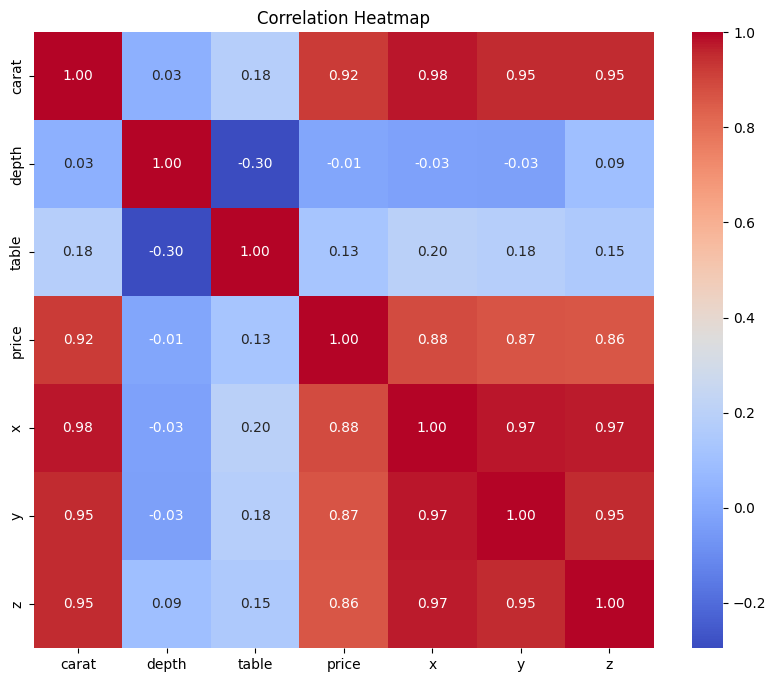

In [8]:
#plotting heatmap for non-categorical values using heat map 
#using float64 and int64 to make sure we are plotting the correlation for non-categorical(quantitative values)
numerical_columns = diamonds_df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = diamonds_df[numerical_columns]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

If we observe the heap map above, we can see that the price has a correlation of value 0.92 with carat. And the color is red.

Positive correlation values are represented by red or orange. 
Negative correlation values ary representedbyf blue or green 
The intensity of the color represents the magnitude or strength of the correlation. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations
since the color is red, and its shade is on the darker side with a correlation value of 0.92, we can deduce that price and carat have the highest correlation..


#### 2b

In [9]:
#splitting the data into training set and testing set. We split the data making one column to be independent variable and the other 
# column to be dependent variable

from sklearn.model_selection import train_test_split
X = diamonds_df[['carat']]  # Assuming 'carat' has the highest correlation
y = diamonds_df['price']

#we want to randomly split the data. taking either first 25% of the columns or last 25% of the columns might give us biased data. so we are using 
#random number as 50 and test size as 25%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
print('number of rows in ' ,len(X_train))
print('number of rows in ' ,len(X_test))
print('index of first row in ' , X_train.index[0])
print('index of first row in ' , X_test.index[0])
print('first five rows ')
X_train.head()
X_test.head()

number of rows in  40455
number of rows in  13485
index of first row in  32301
index of first row in  44751
first five rows 


,carat
32301,0.37000
39009,0.40000
22757,1.02000
15129,1.07000
17861,1.19000


,carat
44751,0.51000
22963,2.01000
9078,1.08000
26148,2.13000
29451,0.33000


since we gave the split as 25% test data. training data will obviously have more rows than test data.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Retrieving  the coefficients
b0 = model.intercept_
b1 = model.coef_[0]
#b0 is the estimated coefficient for intercept and b1 represents the predicted slope coefficient 

# using b0 and b1( predicted coefficients), we are trying to predict y_pred_train which predicts values of the dependent variable based on the independent variable in the training set
y_pred_train = model.predict(X_train)
# r2 defines how well our regression model fits the training data. so we have predicted y values that we obtained from b0 and b1 and we have real values
#based on these values we say how accurate our model is.
r2 = r2_score(y_train, y_pred_train)

#print r2, b0,b1
print("R-squared:", r2)
print("Beta_0:", b0)
print("Beta_1:", b1)




LinearRegression()

R-squared: 0.8486051211546091
Beta_0: -2244.8040004118293
Beta_1: 7740.345463416539


we cab see 84.6% of r2, which means our linear regression model fits the data better. as we know, a higher r2 2
  (R-squared) vally indicates that the linear regression model fitsdata better
�
2


In [11]:
from sklearn.metrics import mean_absolute_error

# Predict the value of the independent variable using trained data set and comparing it against the test data set.
#in the earlier case, we predicted the value of the independent variable using trained data and compared it against train data set.
y_pred_test = model.predict(X_test)

# Creating a dataframe to compare predictions with actual prices
predictions_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred_test})

# Calculating mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)

# fraction of MAE calculates teh MAE/ real average price in the test data. so this will show us how much the data got deviated for each
average_price = y_test.mean()
mae_fraction = mae / average_price

#calculating r2 like before, but with test data and test predicted data.
r2_test_slr = r2_score(y_test, y_pred_test)

# Print R-squared and coefficients
print("R-squared:", r2_test_slr)

# Print MAE and fraction of MAE to average price
print("Mean Absolute Error (MAE):", mae)
print("Fraction of MAE to Average Price:", mae_fraction)

R-squared: 0.8514897700970678
Mean Absolute Error (MAE): 998.4973200867952
Fraction of MAE to Average Price: 0.25412063999512985


R2 is 85%, which is closer to 0 and higher than 1, that means our regression model fits the data better. 
However, lets check MAE and fraction MAE
MAE is 998.497. Mean Absolute Error is calculted by first calculating the difference between the predicted value and the test value. Then taking an average on that.
So if MAE is 998.49, that means the predicted data deviated by 998.49 from the actual y_test data per each price value on average.
MAE per fraction is the ratio between MAE and average price of the original data. The higher MAE per fraction is, the higher the deviation is.
The fraction of MAE to the average price provides context for the absolute error, indicating that the error is approximately one-fourth of the average price
Expectation--
Looking at R2 one would expect MAE and MAE fraction also to have smaller values. 
However, it's important to note that the MAE and its fraction to the average price are relative to the scale of the dependent variable (price) and may vary depending on the specific dataset and characteristics of the data. Like in this case, we have only considered the independent variable to be carat, while there are approximately 7 other independent variables.
In summary, while the model explains a large portion of the variability in the diamond prices based on carat, there are still other inherent variations and factors that not captured by the model and contribute to prediction errors. These errors are within a reasonable range considering the  the limitations of a simple linear regression model.

# Multiple Linear Regression

In [12]:
from sklearn.model_selection import train_test_split

# Selecting independent variables (features), note that independent variables here are quantitative and dependent variable (price)
X_multi = diamonds_df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y_multi = diamonds_df['price']

# Splitting the data into train and test sets with test size as 0.25 and random state as 50 (just like we did in the previous example)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.25, random_state=50)

# Print lengths and first row index for train and test sets
print('number of rows in ' ,len(X_train_multi))
print('number of rows in ' ,len(X_test))
print('index of first row in ' , X_train_multi.index[0])
print('index of first row in ' , X_test_multi.index[0])
print('first five rows ')
X_train_multi.head()
X_test_multi.head()

number of rows in  40455
number of rows in  13485
index of first row in  32301
index of first row in  44751
first five rows 


,carat,depth,table,x,y,z
32301,0.37000,60.70000,60.00000,4.65000,4.68000,2.83000
39009,0.40000,61.70000,57.00000,4.77000,4.73000,2.93000
22757,1.02000,61.40000,58.00000,6.46000,6.43000,3.96000
15129,1.07000,62.30000,55.00000,6.59000,6.54000,4.09000
17861,1.19000,61.70000,56.00000,6.78000,6.81000,4.19000


,carat,depth,table,x,y,z
44751,0.51000,61.40000,58.00000,5.13000,5.09000,3.14000
22963,2.01000,62.90000,54.00000,8.06000,7.93000,5.05000
9078,1.08000,62.10000,59.00000,6.57000,6.53000,4.07000
26148,2.13000,61.50000,57.00000,8.27000,8.34000,5.11000
29451,0.33000,61.90000,56.00000,4.46000,4.49000,2.77000


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fitting the model with multiple independent variables and a single dependent variable
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Getting the predicted coefficients from the multi model
b0_multi = model_multi.intercept_
b_multi = model_multi.coef_

# Calculating dependent values based on trained independent data(multi independent values like carat, x,y,z for dependent value price)
y_pred_train_multi = model_multi.predict(X_train_multi)
#calculating r2 from the predicted y values and real y values( only for trained data) 
r2_multi = r2_score(y_train_multi, y_pred_train_multi)

# Print R-squared and coefficients
print("R-squared for Multiple Linear Regression:", r2_multi)
print("B0 for Multiple Linear Regression:", b0_multi)
print("B1 coefficients for Multiple Linear Regression:", b_multi)

LinearRegression()

R-squared for Multiple Linear Regression: 0.858089270729732
B0 for Multiple Linear Regression: 21184.40695343029
B1 coefficients for Multiple Linear Regression: [10572.42070164  -212.30889735  -100.98829263 -1339.48535974
    28.72790744   207.71501298]


R2 is 85% which means our multiple linear regression model fits the data really well. 
We have
βˆ0 (intercept): 21184.41
βˆ1 (carat coefficient): 10572.42
βˆ2 (depth coefficient): -212.31
βˆ3 (table coefficient): -100.99
βˆ4 (x coefficient): -1339.49
βˆ5 (y coefficient): 28.73
βˆ6 (z coefficient): 207.72

as we know B0 is the intercept and it represents the estimated price when all the dependent factors are 0.This might not be meaningful interpretation in most of the cases. height cant be zero, width cant be zero.
The coefficients for carat, depth, table, x, y, and z indicate the estimated change in price for a one-unit increase in each respective independent variable, holding other variables constant.
For example, for each additional carat, the price is estimated to increase by approximately $10572.42, all others being constant. Similarly, a one-unit increase in depth is associated with a decrease in price by approximately $212.31, all else being equal.
we can also observe that R2 increase from 84% in linear regression model to 85% in multiple linear regressoin model. THat is because we have accounted for all the dependent factors. 


In [14]:
# Predict price for test set
y_pred_test_multi = model_multi.predict(X_test_multi)

# Create a dataframe to compare predictions with actual prices
predictions_multi_df = pd.DataFrame({'Actual Price': y_test_multi, 'Predicted Price': y_pred_test_multi})

# Calculate mean absolute error (MAE) for multiple linear regression
mae_multi = mean_absolute_error(y_test_multi, y_pred_test_multi)

# Calculate fraction of MAE to the average price in the test set for multiple linear regression
average_price_multi = y_test_multi.mean()
mae_fraction_multi = mae_multi / average_price_multi

r2_multi_test = r2_score(y_test_multi, y_pred_test_multi)

# Print R-squared and coefficients
print("R-squared for Multiple Linear Regression on test data:", r2_multi_test)

# Print MAE and fraction of MAE to average price for multiple linear regression
print("Mean Absolute Error (MAE) for Multiple Linear Regression:", mae_multi)
print("Fraction of MAE to Average Price for Multiple Linear Regression:", mae_fraction_multi)
model_multi.score(X_test_multi, y_pred_test_multi)

R-squared for Multiple Linear Regression on test data: 0.8623985511113483
Mean Absolute Error (MAE) for Multiple Linear Regression: 882.5996348444379
Fraction of MAE to Average Price for Multiple Linear Regression: 0.22462432252360995


1.0

Mean Absolute Error (MAE) for SLR: 998.4973
Mean Absolute Error (MAE) for MLR: 882.5996

Fraction of MAE to Average Price for SLR: 0.2541
Fraction of MAE to Average Price for MLR: 0.2246


if we observe closely, MAE for MLR is lower than MAE for SLR. Similarly MAE fraction for MLR is lesser than MAE fraction for SLR. MAE and MAE fraction calculates the error/deviation of the predicted value from the real value. Higher values of MAE and MAE fraction indicate that our regression model is not the optimal model. Lower values of MAE/MAE fraction denote that our regression model is optimal. As we have predicted during SLR, adding extra independent variables into the model has definitely pushed our model towards optimum.

# Multiple Linear Regression with Categorical Variables

In the second question, we only considered a single independent variable and calculated MAE and MAE fraction which represent the deviation of the predicted value from the real value. 
Then we included quantitative independent variables and calculated MAE and MAE fraction. We observed that there is a decrease in MAE and MAE fraction from SLR model to MLR model
Now we are including categorical independent variables also to calculate MAE and MAE fraction. since we are including all the indpendent variables , the expectation is that all the there should be a decrease in MAE and MAE fraction


In [15]:
# Displaying the first five rows with independent and dependent variables
print(diamonds_df.head())

    carat      cut color clarity    depth    table  price       x       y  \
0 0.23000    Ideal     E     SI2 61.50000 55.00000    326 3.95000 3.98000   
1 0.21000  Premium     E     SI1 59.80000 61.00000    326 3.89000 3.84000   
2 0.23000     Good     E     VS1 56.90000 65.00000    327 4.05000 4.07000   
3 0.29000  Premium     I     VS2 62.40000 58.00000    334 4.20000 4.23000   
4 0.31000     Good     J     SI2 63.30000 58.00000    335 4.34000 4.35000   

        z  
0 2.43000  
1 2.31000  
2 2.31000  
3 2.63000  
4 2.75000  


In [16]:
# Perform one-hot encoding on categorical variables
diamonds_encoded_df = pd.get_dummies(diamonds_df, columns=['cut', 'color', 'clarity'],drop_first=True)

# Display the number of columns in the eventual set
print("Number of columns after one-hot encoding:", diamonds_encoded_df.shape[1])

print(diamonds_encoded_df.dtypes)

Number of columns after one-hot encoding: 24
carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Good            bool
cut_Ideal           bool
cut_Premium         bool
cut_Very Good       bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_IF          bool
clarity_SI1         bool
clarity_SI2         bool
clarity_VS1         bool
clarity_VS2         bool
clarity_VVS1        bool
clarity_VVS2        bool
dtype: object


we are performing One hot encoding technique  to represent categorical variables as binary vectors. It is necessary because it is difficult to handle categorical and quantitative inputs together.

In [17]:
# Selecting independent variables (features) and dependent variable (price) including categorical variables
X_cat = diamonds_encoded_df.drop(columns=['price'])
y_cat = diamonds_encoded_df['price']

# Splitting the data into train and test sets based on test size and random state
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.25, random_state=50)

# Create and fit the model
model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train_cat)

# Get the intercept and coefficients
beta_0_cat = model_cat.intercept_
beta_cat = model_cat.coef_

# Calculate the predicted price data from the trained independent data
y_pred_train_cat = model_cat.predict(X_train_cat)
#now calculating r2 value from the predicted data and actual data
r2_cat = r2_score(y_train_cat, y_pred_train_cat)

# Print R-squared and coefficients
print("R-squared for Multiple Linear Regression with Categorical Variables:", r2_cat)
print("Beta_0 for Multiple Linear Regression with Categorical Variables:", beta_0_cat)
print("Beta coefficients for Multiple Linear Regression with Categorical Variables:")
print(beta_cat)

LinearRegression()

R-squared for Multiple Linear Regression with Categorical Variables: 0.9197535054831985
Beta_0 for Multiple Linear Regression with Categorical Variables: 1499.3392254306773
Beta coefficients for Multiple Linear Regression with Categorical Variables:
[ 1.11814801e+04 -5.85181599e+01 -2.43103736e+01 -9.47154791e+02
  4.71160598e+00 -9.21343078e+01  5.64156045e+02  8.35219660e+02
  7.65684380e+02  7.33319794e+02 -2.25861063e+02 -2.76687793e+02
 -4.79782911e+02 -9.73649105e+02 -1.46411040e+03 -2.39532202e+03
  5.45238205e+03  3.78052359e+03  2.82037545e+03  4.70977853e+03
  4.38909093e+03  5.12101322e+03  5.07443217e+03]


The R-squared value of 0.9197 indicates a strong fit of the model to the training data. Approximately 91.97% of the variability in the diamond prices can be explained by the included independent variables, which means our model is a good fit.
This high R-squared value suggests that the model captures a substantial portion of the variation in diamond prices based on the selected features.
Overall, the model with categorical variables shows a strong fit to the training data, with a high R-squared value indicating that the included variables collectively explain a large portion of the variation in diamond prices. The coefficients provide insights into how each independent variable affects the price of diamonds, holding other variables constant.

In [18]:
# Predict price for test set
y_pred_test_cat = model_cat.predict(X_test_cat)

# Calculate mean absolute error (MAE) for the test set
mae_cat = mean_absolute_error(y_test_cat, y_pred_test_cat)

# Calculate fraction of MAE to the average price in the test set
average_price_cat = y_test_cat.mean()
mae_fraction_cat = mae_cat / average_price_cat

#calculate r2 for the test set
r2_cat_test_data = r2_score(y_test_cat, y_pred_test_cat)

# Print R-squared and coefficients
print("R-squared for Multiple Linear Regression with Categorical Variables on test data:", r2_cat_test_data)

# Print MAE and fraction of MAE to average price
print("Mean Absolute Error (MAE) for Multiple Linear Regression with Categorical Variables:", mae_cat)
print("Fraction of MAE to Average Price for Multiple Linear Regression with Categorical Variables:", mae_fraction_cat)
model_cat.score(X_test_cat, y_pred_test_cat)

R-squared for Multiple Linear Regression with Categorical Variables on test data: 0.9197839099301071
Mean Absolute Error (MAE) for Multiple Linear Regression with Categorical Variables: 744.8276400124356
Fraction of MAE to Average Price for Multiple Linear Regression with Categorical Variables: 0.18956092596179364


1.0

  Mean Absolute Error (MAE) for MLR with categorical variables: 744.8276
  Mean Absolute Error (MAE) For MLR without categorical variables: 882.5996
  Mean Absolute Error (MAE) For SLR: 998.4973

  Fraction of MAE to Average Price For MLR with categorical variables: 0.1896
  Fraction of MAE to Average Price For MLR without categorical variables: 0.2246
  Fraction of MAE to Average Price For SLR: 0.2541

So, the outputs came as predicted. When comparing MLR with categorical variables to MLR without, the MAE for the former is higher (744.8276). This suggests that when comparing MLR with categorical variables to MLR without, the forecasts produced by the former are generally closer to the actual prices. Better predictive performance with MLR models is indicated by the fact that both of the MAE values for MLR are smaller than the MAE for SLR.

Compared to MLR without categorical factors, the fraction of MAE to the average price for MLR with categorical variables (0.1896) is smaller. (0.2246). This shows that when comparing MLR with categorical variables versus MLR without, the errors in relation to the average price are less. Furthermore, the MLR model fractions are both smaller than the SLR model fractio

The inclusion of categorical variables in the MLR model results in a noteworthy enhancement of prediction performance and a decrease in mistakes. More subtleties and variances in the data can be captured by the model with the addition of categorical variables, producing predictions that are more accurate. The improvement may be seen in the lower mean absolute error (MAE) and the percentage of MAE to the average price for MLR that includes categorical variables as opposed to MLR that does not and SLR.
 In summary, it makes sense to anticipate a decrease in errors given the MLR model's good fit with categorical variables. n.r.

# Quantile Regression with Categorical Variables:

In [19]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [20]:
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming diamonds_encoded_df is your DataFrame containing the encoded data

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(diamonds_encoded_df, test_size=0.25, random_state=50)

# Define the formula for quantile regression
quantile_formula = 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

# Fit the quantile regression model for the median (50th percentile)
quantile_model = smf.quantreg(quantile_formula, X_train)
quantile_results = quantile_model.fit(q=0.5)

# Display the model summary
print(quantile_results.summary())


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.7705
Model:                       QuantReg   Bandwidth:                       59.93
Method:                 Least Squares   Sparsity:                        982.9
Date:                Mon, 12 Feb 2024   No. Observations:                40455
Time:                        22:30:38   Df Residuals:                    40432
                                        Df Model:                           22
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6076.4678    213.393     28.476      0.000    5658.213    6494.723
cut_Good[T.True]       -18.5041      9.556     -1.936      0.053     -37.234       0.226
cut_Ideal[T.True]      108.5529      7.073     15.347      0.000      94.689     122.416
cu

In [21]:
# Predicting price for the test set using the quantile regression model
y_predicted_quantile = quantile_results.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mean_absolute_error = np.mean(np.abs(y_predicted_quantile - y_test))

# Calculating the average price in the test set
average_price_test_set = np.mean(y_test)

# Calculating the fraction of MAE to the average price
mae_to_average_price_ratio = mean_absolute_error / average_price_test_set

print("Fraction of MAE to the average price:", mae_to_average_price_ratio)


Fraction of MAE to the average price: 0.1644355087156779
